## Parte 2 - busca informada

Agora implementaremos o algoritmo A$^*$ para encontrar o caminho mais curto em um labirinto. Para tal, considere como exemplo o labirinto super simples abaixo, onde se pretende sair do ponto (0,0) e chegar no ponto (7,6).

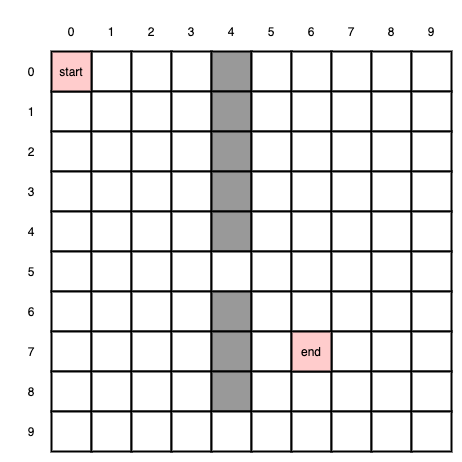


Representaremos um labirinto através de uma matriz, onde números 0 representam posições livres e números 1 representam paredes. No exemplo abaixo, criamos um labirinto simples contendo apenas uma parede na vertical com duas posições livres para permitir o trânsito entre os dois lados do labirinto.

In [ ]:
# The maze
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# Start and end positions
start = (0, 0)
end = (7, 6)

Abaixo, temos uma implementação incompleta do algoritmo A$^*$. Em nossa implementação, o algoritmo é representado pela função `astar`, que recebe uma instância do problema (matriz representando um labirinto), uma posição inicial `(x,y)`, uma posição final `(x,y)` e uma função heurística. Ao ser executada, esta função retornará uma lista de posições representando o caminho mais curto (caso ele exista) entre a posição inicial e a final. Além disso, a função também retorna o número de iterações que foram necessárias para rodar o algoritmo.

In [ ]:
# Class for representing a node (or cell) in the map
class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


# A-star algorithm
def astar(maze, start, end, heuristic):

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    iterations = 0
    while len(open_list) > 0:
        iterations += 1

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1], iterations # Return reversed path and the number of iterations to complete the algorithm

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # up, down, right, left

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            is_in_closed = False
            for closed_child in closed_list:
                if child == closed_child:
                    is_in_closed = True
                    break
            if is_in_closed:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = heuristic(child.position[0], child.position[1], end_node.position[0], end_node.position[1])
            child.f = child.g + child.h

            # Child is already in the open list
            is_in_open = False
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    is_in_open = True
                    break
            if is_in_open:
                continue

            # Add the child to the open list
            open_list.append(child)

Note que, como descrito acima, um dos parâmetros do algoritmo é uma função heurística. Em nossa implementação, uma função heurística deve receber um par de pontos `(x1,y1)` e `(x2,y2)` e retornar a distância estimada entre eles usando uma heurística. O código abaixo apresenta um exemplo de função.

In [ ]:
def f_heuristica(x1, y1, x2, y2):
    return x1-x2 + y1-y2

Tendo definido os elementos acima, podemos agora testar o algoritmo. Para tal, basta executar o código abaixo.

In [ ]:
path = astar(maze, start, end, f_heuristica)
print(path)

([(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (7, 6)], 3132)


Note que o algoritmo retorna uma lista de nós representando o menor caminho, que no nosso caso corresponde pode ser visualizado como abaixo.

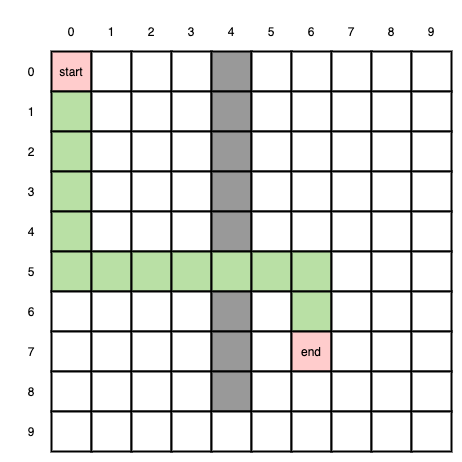

### Exercício 3

Implemente as seguintes heurísticas: distância Euclidiana e distância de Manhattan.

In [ ]:
def h_euclidiana(x1, y1, x2, y2):
  return 0 # TODO

In [ ]:
def h_manhattan(x1, y1, x2, y2):
  return 0 # TODO

### Exercício 4

Crie uma terceira heurística à sua escolha e coloque o seu nome.

Uma heurística que pode ser usada é a chamada distância de Chebyshev, que leva em consideração o máximo das diferenças nas coordenadas x e y.

Essa heurística é admissível, pois nunca superestima o custo real para alcançar o objetivo. Ela é especialmente útil em problemas onde os movimentos na diagonal têm o mesmo custo que os movimentos nas direções x e y, como em um tabuleiro de xadrez. No entanto, a eficácia da heurística ainda depende da natureza do seu grafo e da relação entre os nós.

Já Distância de Octile" e é adequada para problemas em que os movimentos nas diagonais têm um custo diferente dos movimentos nas direções x e y. A Distância de Octile combina as diferenças nas coordenadas x e y e ajusta-as adequadamente para refletir o custo das diagonais.

A heurística de Distância de Octile é admissível e leva em consideração os custos dos movimentos diagonais de forma mais precisa do que a Distância de Chebyshev, tornando-a adequada para problemas em que os movimentos diagonais têm um custo diferente dos movimentos nas direções x e y

In [ ]:
def h_meu_nome(x1, y1, x2, y2):
  return 0 # TODO


def heuristic_chebyshev(x1,y1,x2,y2):

    # Calcule as diferenças nas coordenadas x e y.
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)

    # Use a distância de Chebyshev como heurística.
    return max(dx, dy)

def heuristic_octile(x1,y1,x2,y2):


    # Calcule as diferenças nas coordenadas x e y.
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)

    # Fator de custo para movimentos diagonais (geralmente a raiz quadrada de 2).
    diagonal_cost = 1.4142135623730951  # Aproximadamente raiz quadrada de 2.

    # Use a distância de octile como heurística.
    return max(dx, dy) + (diagonal_cost - 2) * min(dx, dy)



### Exercício 5

Execute o algoritmo A$^*$ com as três heurísticas acima e compare o resultado.

In [ ]:
path = astar(maze, start, end, heuristic_chebyshev)
print(path)

([(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (6, 6), (7, 6)], 631)


(fim)